In [20]:
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
df = pd.read_csv("../../results/align.csv")
df['reference'] = df['file'].str.split('.').str[1]

In [22]:
df

,Unnamed: 0,",sample_name,25%,50%,75%,GC,count,insert_mean,max,mean,min,readlen_mean,reads,std,reference_sequence_name,sequence_length,mapped_reads,unmapped_reads",file,reference
0,0,"0,240216_A00485_0464_AHWGNYDRX3/IE_1658_34_27_...",results_uganda/csv_files/align.uganda.csv,uganda
1,1,"*""",results_uganda/csv_files/align.uganda.csv,uganda
2,2,"0,240918_A00485_0502_BHHYW3DRX5/HEV_24_NGS0000...",results_uganda/csv_files/align.uganda.csv,uganda
3,3,"*""",results_uganda/csv_files/align.uganda.csv,uganda
4,4,"0,240918_A00485_0502_BHHYW3DRX5/HEV_13_NGS0000...",results_uganda/csv_files/align.uganda.csv,uganda
...,...,...,...,...
955,475,"*""",results_sudan/csv_files/align.sudan.csv,sudan
956,476,"0,240918_A00485_0502_BHHYW3DRX5/HEV_25_NGS0000...",results_sudan/csv_files/align.sudan.csv,sudan
957,477,"*""",results_sudan/csv_files/align.sudan.csv,sudan
958,478,"0,240216_A00485_0464_AHWGNYDRX3/IE_11157_83_26...",results_sudan/csv_files/align.sudan.csv,sudan


In [23]:
### Fix columns

header_string = df.columns[1]  # Second column header from dataframe
header_list = [h.strip() for h in header_string.split(',')]

# Ensure the column to split is a string
df.iloc[:, 1] = df.iloc[:, 1].astype(str)

# Split that column into multiple columns
expanded = df.iloc[:, 1].str.split(',', expand=True)
assert expanded.shape[1] == len(header_list), "The number of headers does not match number of columns to split!"

expanded.columns = header_list

# Concatenate all together
df = pd.concat([df.iloc[:, [0]], expanded, df.iloc[:, 2:]], axis=1)

In [28]:
df = df.dropna()

In [29]:
# reads = mapped

df.columns

Index(['Unnamed: 0', '', 'sample_name', '25%', '50%', '75%', 'GC', 'count',
       'insert_mean', 'max', 'mean', 'min', 'readlen_mean', 'reads', 'std',
       'reference_sequence_name', 'sequence_length', 'mapped_reads',
       'unmapped_reads', 'file', 'reference'],
      dtype='object')

In [31]:
df.head()

,Unnamed: 0,,sample_name,25%,50%,75%,GC,count,insert_mean,max,...,min,readlen_mean,reads,std,reference_sequence_name,sequence_length,mapped_reads,unmapped_reads,file,reference
0,0,0,240216_A00485_0464_AHWGNYDRX3/IE_1658_34_27_15...,0.0,1.0,147.0,0.6394108122058115,7202.0,137.05103526366872,12192.0,...,0.0,47.218564650059314,74184.0,1434.402965009367,OQ077986,7202,74184,"""0",results_uganda/csv_files/align.uganda.csv,uganda
2,2,0,240918_A00485_0502_BHHYW3DRX5/HEV_24_NGS000015...,0.0,63.0,1023.0,0.639709016333122,7202.0,189.68267024393688,6422.0,...,0.0,58.164560313481836,113308.0,1564.8582228491111,OQ077986,7202,113308,"""0",results_uganda/csv_files/align.uganda.csv,uganda
4,4,0,240918_A00485_0502_BHHYW3DRX5/HEV_13_NGS000015...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,,0.0,0.0,0.0,OQ077986,7202,0,"""0",results_uganda/csv_files/align.uganda.csv,uganda
6,6,0,240902_A00485_0498_AHHKTGDRX5/HEV_26_NGS000015...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,,0.0,0.0,0.0,OQ077986,7202,0,"""0",results_uganda/csv_files/align.uganda.csv,uganda
8,8,0,240918_A00485_0502_BHHYW3DRX5/HEV_2_NGS0000154...,0.0,0.0,43.0,0.6598732103531642,7202.0,134.17391304347825,10891.0,...,0.0,58.25344023209315,51014.0,1179.1679092539066,OQ077986,7202,51014,"""0",results_uganda/csv_files/align.uganda.csv,uganda


In [32]:
df[['mapped_reads','reads']]

,mapped_reads,reads
0,74184,74184.0
2,113308,113308.0
4,0,0.0
6,0,0.0
8,51014,51014.0
...,...,...
950,5312872,5312872.0
952,95960,95960.0
954,0,0.0
956,0,0.0


In [35]:
df['count']

0      7202.0
2      7202.0
4         0.0
6         0.0
8      7202.0
        ...  
950    7135.0
952    7135.0
954       0.0
956       0.0
958    7135.0
Name: count, Length: 480, dtype: object

In [34]:
df['unmapped_reads'].unique()

array(['"0'], dtype=object)

(array([181.,  33.,  33.,  33.,  33.,  34.,  33.,  33.,  33.,  34.]),
 array([  0. ,  33.2,  66.4,  99.6, 132.8, 166. , 199.2, 232.4, 265.6,
        298.8, 332. ]),
 <BarContainer object of 10 artists>)

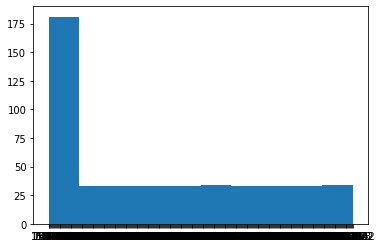

In [15]:
plt.hist(df['mapped'])